# Imports

In [1]:
%matplotlib inline

import scipy as sp
from scipy import stats
import numpy as np
import pandas as pd
from pandas import plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')

import statistics

# Load Data

In [2]:
tracing_df = pd.read_csv('features.csv', index_col=0)
tracing_df.sort_values(by=['subjectNumber', 'scenarioType', 'displayType'], inplace=True)
tracing_df.head(20)

,subjectNumber,scenarioNumber,newAfterOld,scenarioType,displayType,sensorPlacementTime,ppvStartTime,ccStartTime,inSpO2TargetRangeDuration,inSpO2TargetRangeStartTime,aboveSpO2TargetRangeDuration,belowSpO2TargetRangeDuration,inFiO2TargetRangeDuration,inFiO2TargetRangeStartTime,aboveFiO2TargetRangeDuration,belowFiO2TargetRangeDuration,spO2SignedErrorIntegral,spO2UnsignedErrorIntegral,spO2SquaredErrorIntegral
id,,,,,,,,,,,,,,,,,,,
20160901_P1a_4_S4,4,4,0,0,0,53,47,NaN,18,120.0,16,146,30,88.0,72,124,-14.286667,15.066667,1.788744
20160901_P1a_4_S1,4,1,0,0,1,92,62,NaN,70,170.0,0,118,104,136.0,0,134,-13.100000,13.100000,1.611016
20160916_P1a_5_S1,5,1,1,0,0,40,44,NaN,70,116.0,0,106,62,86.0,38,122,-8.063333,8.110000,0.773772
20160916_P1a_5_S4,5,4,1,0,1,51,43,NaN,52,116.0,16,108,70,138.0,50,108,-7.256667,8.156667,0.740783
20160916_P1a_5_S2,5,2,1,1,0,35,40,176.0,88,152.0,0,100,166,74.0,0,72,-22.410000,22.410000,6.444206
20160916_P1a_5_S3,5,3,1,1,1,44,37,174.0,14,156.0,0,172,88,82.0,0,146,-26.736667,26.736667,6.925639
20160916_P1a_6_S3,6,3,0,1,0,37,39,111.0,0,NaN,0,186,58,100.0,0,176,-26.273333,26.273333,6.603033
20160916_P1a_6_S2,6,2,0,1,1,63,31,118.0,58,142.0,0,126,88,118.0,0,146,-19.676667,19.676667,4.874739
20160920_P1a_7_S1,7,1,1,0,0,24,56,NaN,76,102.0,0,110,122,68.0,8,102,-11.213333,11.213333,1.382356


# Aggregate Comparisons

## Histograms of Outcomes per Scenario/Display Pairing

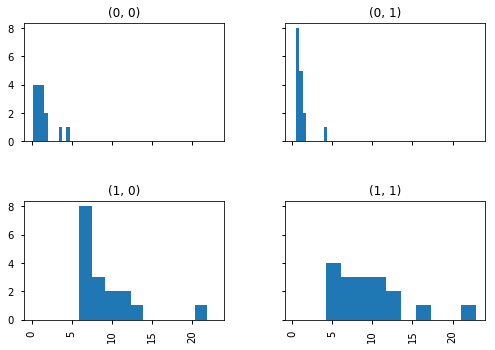

In [3]:
statistics.hist_scenario_display(tracing_df, 'spO2SquaredErrorIntegral')

Comments:

* SpO2 squared error integral is not normally distributed; if there were more samples, I might interpret the shape as something like an exponential curve. This suggests that we should use the Wilcoxon signed-rank test rather than the paired T-test.
* The new display seems to reduce accumulated error with the easy scenario
* The new display seems to reduce the minimum accumulated error with the hard scenario, but it flattens the distribution out (so overall accumulated errors are higher on average)

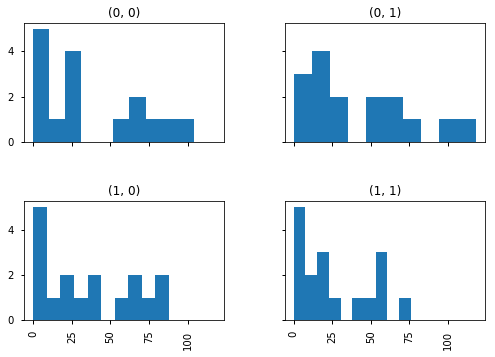

In [4]:
statistics.hist_scenario_display(tracing_df, 'inSpO2TargetRangeDuration')

Comments:

* It's hard to see much of a difference between old and new displays here.

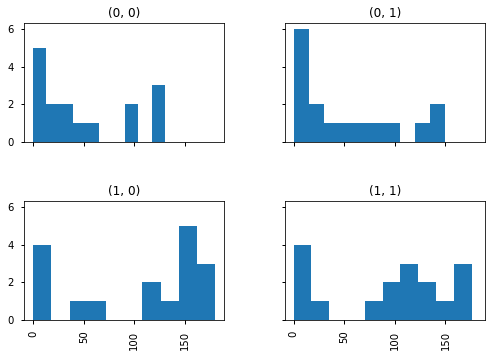

In [5]:
statistics.hist_scenario_display(tracing_df, 'inFiO2TargetRangeDuration')

Comments:

* On the easy scenario, the new display seems to flatten out the distribution towards the higher values.
* On the hard scenario, it's hard to say for sure. It seems that the new display seems to flatten out the distribution towards the middle values.

# Pairing

### Scenario Type Pairing

In [6]:
tracing_easy_df = tracing_df[tracing_df.scenarioType == 1]
tracing_hard_df = tracing_df[tracing_df.scenarioType == 0]
(tracing_easy_df, tracing_hard_df) = statistics.intersect_by_series(tracing_easy_df, tracing_hard_df, 'subjectNumber')
statistics.check_pairing_validity(tracing_easy_df, tracing_hard_df, 'subjectNumber')
statistics.check_pairing_validity(tracing_easy_df, tracing_hard_df, 'displayType')

subjectNumber correctly paired? Yes.
displayType correctly paired? Yes.


In [7]:
for (test_name, test) in statistics.TESTS.items():
    print(test_name + ':')
    for feature in statistics.OUTCOMES:
        result = test(tracing_easy_df[feature], tracing_hard_df[feature])
        statistics.print_result(feature, result)

Paired T-Test:
 sensorPlacementTime: Ttest_relResult(statistic=-0.25577872657361012, pvalue=0.79992727786279394)
 * ppvStartTime: Ttest_relResult(statistic=-1.8497245413204695, pvalue=0.074568481783492846)
 * inSpO2TargetRangeDuration: Ttest_relResult(statistic=-1.8781985169355351, pvalue=0.070442376705431339)
 ** aboveSpO2TargetRangeDuration: Ttest_relResult(statistic=-5.8742327507916512, pvalue=2.250318068106468e-06)
 ** belowSpO2TargetRangeDuration: Ttest_relResult(statistic=7.7889388148081045, pvalue=1.3706391375517859e-08)
 ** inFiO2TargetRangeDuration: Ttest_relResult(statistic=3.2566205001510626, pvalue=0.0028703247177721647)
 ** aboveFiO2TargetRangeDuration: Ttest_relResult(statistic=-7.9475022820979184, pvalue=9.1524022941755077e-09)
 ** belowFiO2TargetRangeDuration: Ttest_relResult(statistic=3.2634237323787452, pvalue=0.0028205628477536338)
 ** spO2SignedErrorIntegral: Ttest_relResult(statistic=-12.405489099227317, pvalue=4.024269660223122e-13)
 ** spO2UnsignedErrorIntegral: 

### Display Type Pairing

In [8]:
tracing_new_df = tracing_df[tracing_df.displayType == 1]
tracing_old_df = tracing_df[tracing_df.displayType == 0]
statistics.check_pairing_validity(tracing_old_df, tracing_new_df, 'subjectNumber')
statistics.check_pairing_validity(tracing_old_df, tracing_new_df, 'scenarioType')

subjectNumber correctly paired? Yes.
scenarioType correctly paired? Yes.


In [9]:
for (test_name, test) in statistics.TESTS.items():
    print(test_name + ':')
    for feature in statistics.OUTCOMES:
        result = test(tracing_old_df[feature], tracing_new_df[feature])
        statistics.print_result(feature, result)

Paired T-Test:
 sensorPlacementTime: Ttest_relResult(statistic=-1.2982269672237463, pvalue=0.20348850903777266)
 ppvStartTime: Ttest_relResult(statistic=-0.23853627578929773, pvalue=0.81298617508338655)
 inSpO2TargetRangeDuration: Ttest_relResult(statistic=0.449521233891929, pvalue=0.6560858235544047)
 aboveSpO2TargetRangeDuration: Ttest_relResult(statistic=-0.19011226473446349, pvalue=0.85042204928631371)
 belowSpO2TargetRangeDuration: Ttest_relResult(statistic=-0.17575167720434182, pvalue=0.8615965052109793)
 inFiO2TargetRangeDuration: Ttest_relResult(statistic=0.61793966052017213, pvalue=0.54098839977114621)
 aboveFiO2TargetRangeDuration: Ttest_relResult(statistic=0.1770496555457694, pvalue=0.8605852743410991)
 belowFiO2TargetRangeDuration: Ttest_relResult(statistic=-0.70775917527942478, pvalue=0.48421821857690261)
 spO2SignedErrorIntegral: Ttest_relResult(statistic=0.16300097893336576, pvalue=0.87154270845022497)
 spO2UnsignedErrorIntegral: Ttest_relResult(statistic=-0.299135881706